# Import the Libraray

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# File upload

In [2]:
url ='https://raw.githubusercontent.com/DataScience75/batch89/main/train.csv'
train= pd.read_csv(url)
print(train.head(2))


             datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 0:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 1:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0      81.0        0.0       3          13     16  
1      80.0        0.0       8          32     40  


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    12980 non-null  object 
 1   season      12980 non-null  int64  
 2   holiday     12980 non-null  int64  
 3   workingday  12980 non-null  int64  
 4   weather     12980 non-null  int64  
 5   temp        12980 non-null  float64
 6   atemp       12980 non-null  float64
 7   humidity    12980 non-null  float64
 8   windspeed   12980 non-null  float64
 9   casual      12980 non-null  int64  
 10  registered  12980 non-null  int64  
 11  count       12980 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [5]:
train.shape

(12980, 12)

In [6]:
train.count

<bound method DataFrame.count of                   datetime  season  holiday  workingday  weather   temp  \
0       2011-01-01 0:00:00       1        0           0        1   9.84   
1       2011-01-01 1:00:00       1        0           0        1   9.02   
2       2011-01-01 2:00:00       1        0           0        1   9.02   
3       2011-01-01 3:00:00       1        0           0        1   9.84   
4       2011-01-01 4:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
12975  2012-06-29 20:00:00       3        0           1        1  37.72   
12976  2012-06-29 21:00:00       3        0           1        2  35.26   
12977  2012-06-29 22:00:00       3        0           1        3  33.62   
12978  2012-06-29 23:00:00       3        0           1        3  33.62   
12979   2012-06-30 0:00:00       3        0           0        3  26.24   

        atemp  humidity  windspeed  casual  registered  count  
0 

In [3]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
train['season'].value_counts()

2    4409
1    3980
3    2457
4    2134
Name: season, dtype: int64

In [9]:
train['count'].value_counts(123)

5      0.015562
4      0.015331
3      0.014869
2      0.014638
6      0.014253
         ...   
748    0.000077
677    0.000077
775    0.000077
616    0.000077
697    0.000077
Name: count, Length: 752, dtype: float64

In [10]:
train['datetime'].value_counts()

2011-01-01 0:00:00     1
2012-01-01 12:00:00    1
2012-01-01 2:00:00     1
2012-01-01 3:00:00     1
2012-01-01 4:00:00     1
                      ..
2011-07-04 7:00:00     1
2011-07-04 8:00:00     1
2011-07-04 9:00:00     1
2011-07-04 10:00:00    1
2012-06-30 0:00:00     1
Name: datetime, Length: 12980, dtype: int64

In [11]:
train['holiday'].value_counts()

0    12623
1      357
Name: holiday, dtype: int64

In [12]:
train['workingday'].value_counts()

1    8904
0    4076
Name: workingday, dtype: int64

In [5]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month


In [6]:

train = pd.get_dummies(train, columns=['season', 'holiday', 'workingday', 'weather'])


In [7]:
X = ['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month','season','workingday'] + list(train.columns[train.columns.str.startswith('season_') | train.columns.str.startswith('holiday_') | train.columns.str.startswith('workingday_') | train.columns.str.startswith('weather_')])
y = 'count'  


# split the data

In [12]:
X= train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'hour', 'day', 'month', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1',
       'weather_1', 'weather_2', 'weather_3', 'weather_4']]
y=train['count']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)


In [14]:
X_train

,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
11169,28.70,31.820,39.0,19.0012,282,346,628,14,15,4,...,0,0,1,0,1,0,1,0,0,0
1039,9.02,12.880,41.0,6.0032,0,15,15,0,16,2,...,0,0,1,0,0,1,1,0,0,0
5157,29.52,34.850,79.0,11.0014,68,160,228,19,7,8,...,1,0,1,0,1,0,1,0,0,0
5916,25.42,25.760,100.0,11.0014,0,8,8,1,9,9,...,1,0,1,0,0,1,0,1,0,0
3306,27.88,31.820,61.0,8.9981,72,201,273,16,22,5,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,22.14,25.760,64.0,8.9981,28,245,273,20,11,5,...,0,0,1,0,0,1,1,0,0,0
9917,14.76,17.425,87.0,12.9980,3,88,91,6,23,2,...,0,0,1,0,0,1,1,0,0,0
4079,28.70,33.335,74.0,12.9980,46,188,234,21,23,6,...,1,0,1,0,0,1,1,0,0,0
2254,12.30,13.635,93.0,27.9993,1,52,53,19,8,4,...,0,0,1,0,0,1,0,0,1,0


In [15]:
y_train

11169    628
1039      15
5157     228
5916       8
3306     273
        ... 
3046     273
9917      91
4079     234
2254      53
2915     188
Name: count, Length: 10384, dtype: int64

In [16]:
X_test

,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
4897,30.34,33.335,45.0,6.0032,16,93,109,23,27,7,...,1,0,1,0,0,1,1,0,0,0
4250,27.06,31.060,50.0,0.0000,20,48,68,0,1,7,...,1,0,1,0,0,1,1,0,0,0
11078,16.40,20.455,40.0,23.9994,28,356,384,19,11,4,...,0,0,1,0,0,1,1,0,0,0
8311,8.20,11.365,75.0,0.0000,6,63,69,23,17,12,...,0,1,1,0,1,0,1,0,0,0
8064,17.22,21.210,94.0,12.9980,3,28,31,16,7,12,...,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,8.20,9.090,37.0,19.0012,9,64,73,13,7,1,...,0,0,1,0,0,1,0,1,0,0
10172,10.66,12.120,41.0,16.9979,9,53,62,22,4,3,...,0,0,1,0,1,0,1,0,0,0
10705,9.84,10.605,32.0,23.9994,0,3,3,4,27,3,...,0,0,1,0,0,1,1,0,0,0
7535,22.14,25.760,60.0,19.0012,27,120,147,14,15,11,...,0,1,1,0,0,1,0,1,0,0


In [17]:
 y_test

4897     109
4250      68
11078    384
8311      69
8064      31
        ... 
150       73
10172     62
10705      3
7535     147
2474      39
Name: count, Length: 2596, dtype: int64

# create a model


In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
X_train

,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
11169,28.70,31.820,39.0,19.0012,282,346,628,14,15,4,...,0,0,1,0,1,0,1,0,0,0
1039,9.02,12.880,41.0,6.0032,0,15,15,0,16,2,...,0,0,1,0,0,1,1,0,0,0
5157,29.52,34.850,79.0,11.0014,68,160,228,19,7,8,...,1,0,1,0,1,0,1,0,0,0
5916,25.42,25.760,100.0,11.0014,0,8,8,1,9,9,...,1,0,1,0,0,1,0,1,0,0
3306,27.88,31.820,61.0,8.9981,72,201,273,16,22,5,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,22.14,25.760,64.0,8.9981,28,245,273,20,11,5,...,0,0,1,0,0,1,1,0,0,0
9917,14.76,17.425,87.0,12.9980,3,88,91,6,23,2,...,0,0,1,0,0,1,1,0,0,0
4079,28.70,33.335,74.0,12.9980,46,188,234,21,23,6,...,1,0,1,0,0,1,1,0,0,0
2254,12.30,13.635,93.0,27.9993,1,52,53,19,8,4,...,0,0,1,0,0,1,0,0,1,0


In [24]:
y_train

11169    628
1039      15
5157     228
5916       8
3306     273
        ... 
3046     273
9917      91
4079     234
2254      53
2915     188
Name: count, Length: 10384, dtype: int64

# PREDICITION

In [19]:
predictions = model.predict(X_train)


In [32]:
predictions

array([627.66,  15.  , 228.  , ..., 234.  ,  53.  , 188.  ])

In [25]:
mae= mean_absolute_error(y_train,predictions)

In [27]:
print(f'Error: {mae}')

Error: 0.017502889060091332


# Aaccuracy

In [28]:
accuracy = model.score(X,y)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9999967352301641


# PLOT

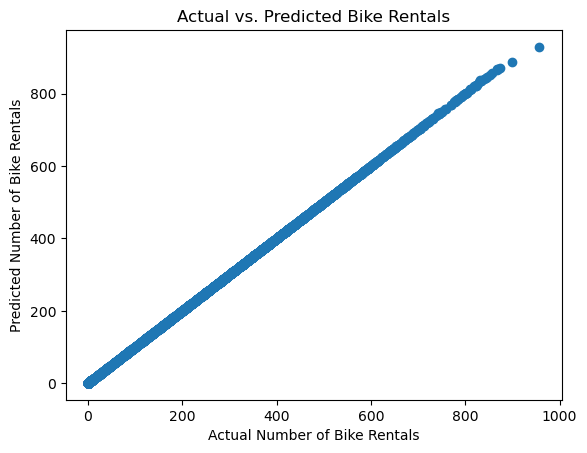

In [34]:
plt.scatter(y_train, predictions)
plt.xlabel('Actual Number of Bike Rentals')
plt.ylabel('Predicted Number of Bike Rentals')
plt.title('Actual vs. Predicted Bike Rentals')
plt.show()


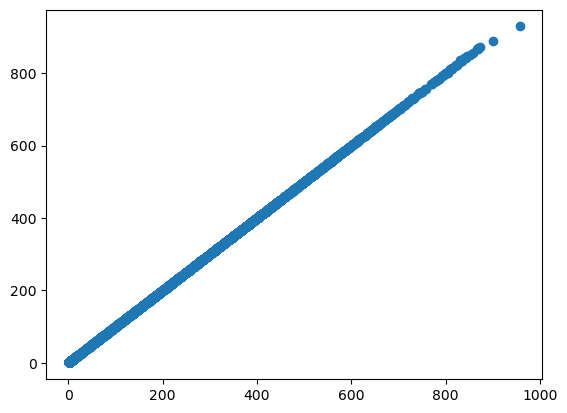

In [37]:
plt.scatter(y_train, predictions)

# Prediticion

In [39]:
pred = model.predict(X_test)


In [40]:
pred

array([109.,  68., 384., ...,   3., 147.,  39.])

In [41]:
mae= mean_absolute_error(y_test,predictions)

In [47]:
print(f'Error: {mae}')

Error: 0.025989984591678665


# Accuracy

In [43]:
accuracy = model.score(X,y)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9999967352301641


# PLOT

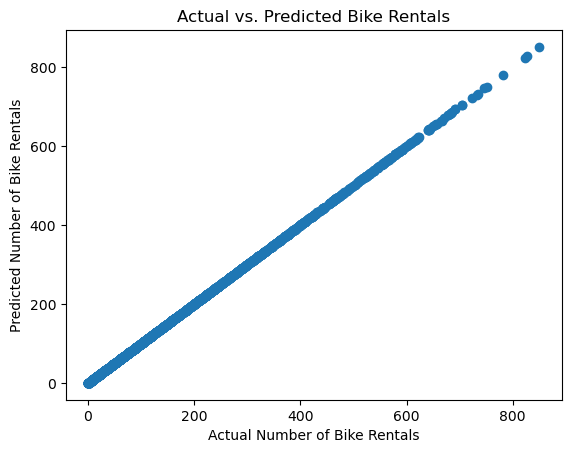

In [46]:
plt.scatter(y_test, pred)
plt.xlabel('Actual Number of Bike Rentals')
plt.ylabel('Predicted Number of Bike Rentals')
plt.title('Actual vs. Predicted Bike Rentals')
plt.show()
